<a href="https://colab.research.google.com/github/Nanashi-bot/butterfly_classifier_vgg16/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
# {"username":"nanash74","key":"2f3c8baafb1f0e8b173cb3cae49aad11"}
od.download("https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nanash74
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification


100%|██████████| 226M/226M [00:15<00:00, 15.7MB/s]


In [3]:
import os

# Path to the downloaded dataset folder
dataset_path = "/content/butterfly-image-classification/train"

# List the contents of the dataset directory
print(len(os.listdir(dataset_path)))

6499


In [4]:
import pandas as pd
train_df = pd.read_csv('/content/butterfly-image-classification/Training_set.csv')

In [5]:
train_df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


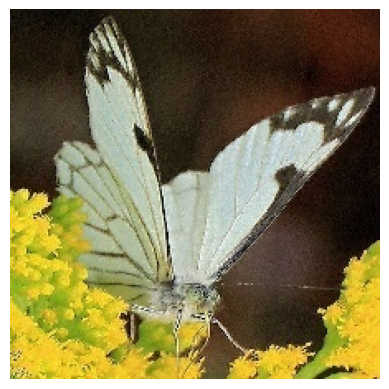

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('/content/butterfly-image-classification/test/Image_1.jpg')
plt.imshow(img)
plt.axis('off')  # To turn off the axis
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        # First Conv Block
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3,3), padding="same")
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), padding="same")
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # Second Conv Block
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding="same")
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), padding="same")
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # Third Conv Block
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), padding="same")
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), padding="same")
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), padding="same")
        self.pool3 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # Fourth Conv Block
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3), padding="same")
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding="same")
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding="same")
        self.pool4 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # Fifth Conv Block
        self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding="same")
        self.conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding="same")
        self.conv13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding="same")
        self.pool5 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # Fully Connected Layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=512 * 7 * 7, out_features=4096)  # Assuming input image size is 224x224
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=75)  # Output layer for 75 classes

    def forward(self, x):
        # Forward pass through convolutional blocks
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)

        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = self.pool3(x)

        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x))
        x = self.pool4(x)

        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x = F.relu(self.conv13(x))
        x = self.pool5(x)

        # Flatten the output for the fully connected layers
        x = self.flatten(x)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No activation here, because we apply softmax outside for classification

        return x

# Create the model instance
# model = ConvNet().to('cuda')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvNet().to(device)
# model = ConvNet()

# Print the model summary
print(model)


ConvNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv10): Conv

In [8]:
import torch.optim as optim

# Define the optimizer (Adam with learning rate 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()  # In PyTorch, CrossEntropyLoss includes softmax internally

In [ ]:
# ModelCheckpoint and the EarlyStopping

In [9]:
from PIL import Image
import os
image_folder = "/content/butterfly-image-classification/train"

image_list = []

# Iterate through all files in the directory
for filename in os.listdir(image_folder):
    file_path = os.path.join(image_folder, filename)

    # Open the image file
    with Image.open(file_path) as img:
        img = img.convert('RGB')
        image_list.append(img)


datasetlabels = pd.read_csv("/content/butterfly-image-classification/Training_set.csv")

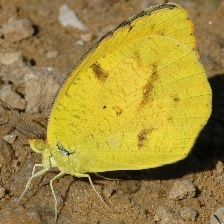

In [10]:
image_list[1]

In [ ]:
torch.save(model.state_dict(), 'model_ten_epochs.pth')

In [ ]:
from google.colab import files

# Download a file
files.download('model_ten_epochs.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# THIS IS HOW TO USE DATALOADERS PROPERLY

In [15]:
labels = train_df['label'].unique()

In [16]:
labels_map = {i: label for i, label in enumerate(labels)}

# Printing the result
print(labels_map)
reverse_labels_map = {v: k for k, v in labels_map.items()}
# print(reverse_labels_map["ADONIS"])

{0: 'SOUTHERN DOGFACE', 1: 'ADONIS', 2: 'BROWN SIPROETA', 3: 'MONARCH', 4: 'GREEN CELLED CATTLEHEART', 5: 'CAIRNS BIRDWING', 6: 'EASTERN DAPPLE WHITE', 7: 'RED POSTMAN', 8: 'MANGROVE SKIPPER', 9: 'BLACK HAIRSTREAK', 10: 'CABBAGE WHITE', 11: 'RED ADMIRAL', 12: 'PAINTED LADY', 13: 'PAPER KITE', 14: 'SOOTYWING', 15: 'PINE WHITE', 16: 'PEACOCK', 17: 'CHECQUERED SKIPPER', 18: 'JULIA', 19: 'COMMON WOOD-NYMPH', 20: 'BLUE MORPHO', 21: 'CLOUDED SULPHUR', 22: 'STRAITED QUEEN', 23: 'ORANGE OAKLEAF', 24: 'PURPLISH COPPER', 25: 'ATALA', 26: 'IPHICLUS SISTER', 27: 'DANAID EGGFLY', 28: 'LARGE MARBLE', 29: 'PIPEVINE SWALLOW', 30: 'BLUE SPOTTED CROW', 31: 'RED CRACKER', 32: 'QUESTION MARK', 33: 'CRIMSON PATCH', 34: 'BANDED PEACOCK', 35: 'SCARCE SWALLOW', 36: 'COPPER TAIL', 37: 'GREAT JAY', 38: 'INDRA SWALLOW', 39: 'VICEROY', 40: 'MALACHITE', 41: 'APPOLLO', 42: 'TWO BARRED FLASHER', 43: 'MOURNING CLOAK', 44: 'TROPICAL LEAFWING', 45: 'POPINJAY', 46: 'ORANGE TIP', 47: 'GOLD BANDED', 48: 'BECKERS WHITE', 4

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.jpg')]
        self.labels = [self._get_label_from_filename(img) for img in os.listdir(image_dir) if img.endswith('.jpg')]

    def _get_label_from_filename(self, filename):
        return reverse_labels_map[train_df[train_df['filename'] == filename]["label"].iloc[0]]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_data = CustomDataset(
    image_dir='/content/butterfly-image-classification/train',
    transform=transform
)

test_data = CustomDataset(
    image_dir='/content/butterfly-image-classification/test',
    transform=transform
)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [30]:
i=0
for inputs, labels in train_loader:
    print(labels)
    i+=1
    if i==3: break

tensor([ 0, 40, 31,  0, 10, 38,  0, 68, 21, 50, 67, 13, 24, 38, 18, 23,  9, 10,
        32, 44, 56, 15, 55, 74, 46,  2, 37, 23, 12, 31,  2, 33])
tensor([24, 44, 51, 72, 29, 72, 15,  1, 43, 71,  2, 24, 70, 62,  2, 38, 39, 18,
        44,  7, 18, 43, 23, 60, 40, 66, 49, 51, 59, 33, 10, 36])
tensor([65, 13, 13,  8, 38, 31, 11, 32,  7, 40, 23, 53, 14, 37, 27, 69, 20, 50,
        62,  0, 15, 56, 54, 32, 26, 34, 24, 65, 10, 15, 32, 26])


Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


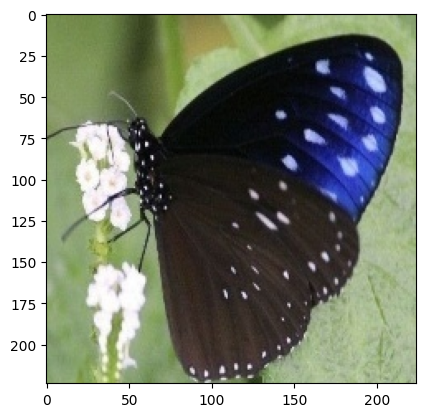

Label: 30


In [18]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
img = img.permute(1, 2, 0)
plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [34]:
import time
num_epochs = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")
    end_time = time.time()
    epoch_time = end_time - start_time

    print(f"Epoch {epoch + 1}/{num_epochs} completed in {epoch_time:.2f} seconds.")

Epoch [1/1], Loss: 4.316150716706818
Epoch 1/1 completed in 98.70 seconds.


In [ ]:
lab = train_df['label'].unique()

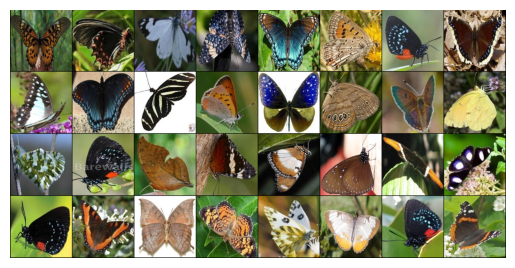

GroundTruth:  MANGROVE SKIPPER
 MONARCH
 SLEEPY ORANGE
 COPPER TAIL
 GREAT EGGFLY
 EASTERN DAPPLE WHITE
 SLEEPY ORANGE
 SOUTHERN DOGFACE
 SOOTYWING
 BLUE MORPHO
 LARGE MARBLE
 COMMON BANDED AWL
 ADONIS
 BLACK HAIRSTREAK
 PURPLISH COPPER
 ELBOWED PIERROT
 PIPEVINE SWALLOW
 EASTERN COMA
 JULIA
 INDRA SWALLOW
 SOOTYWING
 MOURNING CLOAK
 PINE WHITE
 BLUE SPOTTED CROW
 SOUTHERN DOGFACE
 PEACOCK
 METALMARK
 CAIRNS BIRDWING
 BLUE MORPHO
 SLEEPY ORANGE
 PIPEVINE SWALLOW
 BLUE SPOTTED CROW



In [ ]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Make a grid from the images
image_grid = torchvision.utils.make_grid(images)

# Convert the image grid from (C, H, W) to (H, W, C) for plotting
image_grid = image_grid.permute(1, 2, 0)

# Plot the images
plt.imshow(image_grid)
plt.axis('off')  # Optionally remove the axis
plt.show()

# Print ground truth labels
print('GroundTruth: ', ' '.join(f'{lab[labels[j]]}\n' for j in range(32)))

In [ ]:
# Testing loop
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move inputs and labels to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        print(outputs)

tensor([[-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        ...,
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202]],
       device='cuda:0')
tensor([[-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        ...,
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202]],
       device='cuda:0')
tensor([[-0.0019, -0.0029,  0.0897,  ..., -0.1088, -0.0333, -0.0202],
        [-0.00

In [ ]:
outputs.shape

torch.Size([2, 75])

In [ ]:
outputs[0].argmax()

tensor(43, device='cuda:0')